ASSIGNMENT 1
ET 3112 - IMAGE PROCESSING AND MACHINE LEARNING


D/ENG/21/0152/EE
K.H.M.NILHARA

GITHUB LINK - https://github.com/m-a-n-d-i/Assignment-1

QUESTION 1

100
0
120
0
0
256


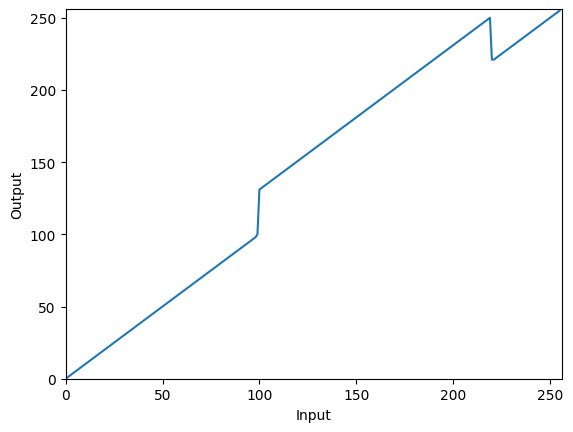

Text(0.5, 1.0, 'Transformed Image')

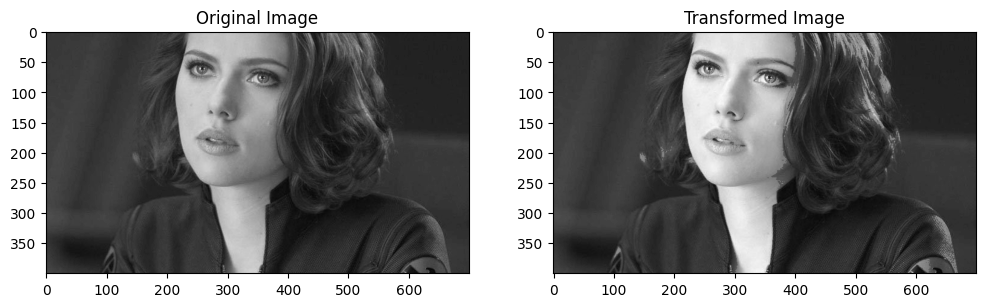

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,100), (100,130), (220,250), (220,220)])

t0=np.linspace(0,c[0,1],c[0,0]).astype('uint8')
print(len(t0))
t1=np.linspace(c[0,1],c[1,1],0).astype('uint8')
print(len(t1))
t2=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
print(len(t2))
t3=np.linspace(c[2,1],c[3,1],0).astype('uint8')
print(len(t3))
t4=np.linspace(c[3,1]+1,255,256-c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t0,t1), axis=0).astype('uint8')
transform = np.concatenate((transform,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
transform = np.concatenate((transform,t4), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax. set_xlabel('Input')
ax. set_ylabel('Output')
ax. set_xlim(0,256)
ax. set_ylim(0,256)
plt.savefig('transform.png')
plt.show()

im = cv.imread('IMAGES/natasha.jpg', 0)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
im2 = cv.LUT(im,transform)
cv.imshow('Transformed Image', im2)
cv.waitKey(0)
cv.destroyAllWindows()


fig, ax= plt.subplots(1,2, figsize=(12,24))

ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(im2, cmap='gray')
ax[1].set_title('Transformed Image')


QUESTION 2

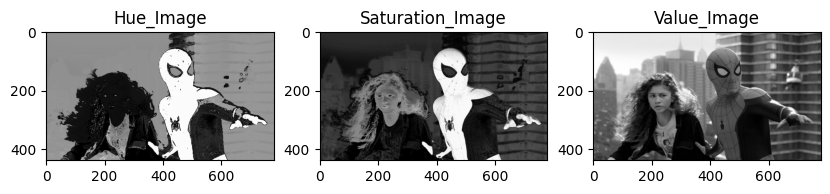

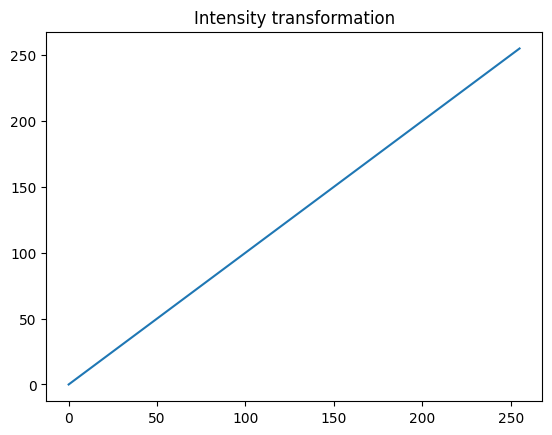

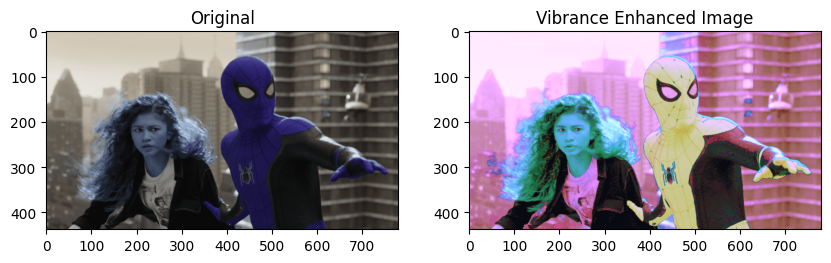

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('IMAGES/spider.png', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
hue_img,sat_img,val_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(hue_img, cmap="gray")
ax[0].set_title('Hue_Image')
ax[1].imshow(sat_img, cmap="gray")
ax[1].set_title('Saturation_Image')
ax[2].imshow(val_img, cmap="gray")
ax[2].set_title('Value_Image')
plt.show()

x= np.arange(0, 256).astype('uint8')
a = 0.2
sigma = 70
F = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128), 255).astype('uint8')
image_transform = cv.LUT(sat_img, F)
plt.title('Intensity transformation')
plt.plot(F)
plt.show()

new = cv.merge([hue_img,image_transform,val_img])
result =  cv.cvtColor(new,  cv.COLOR_HSV2BGR)
added = cv.add(new, im)

fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(added, cmap="gray")
ax[1].set_title('Vibrance Enhanced Image')

plt.show()


QUESTION 3

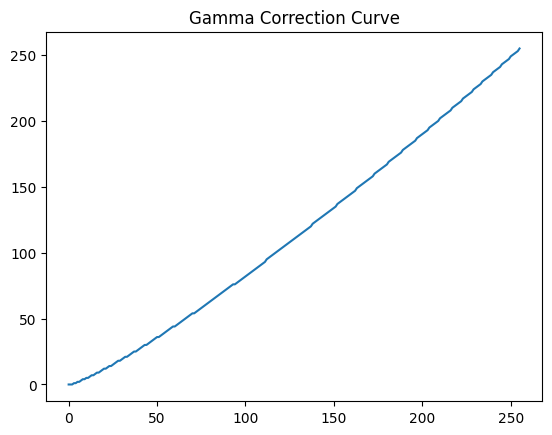

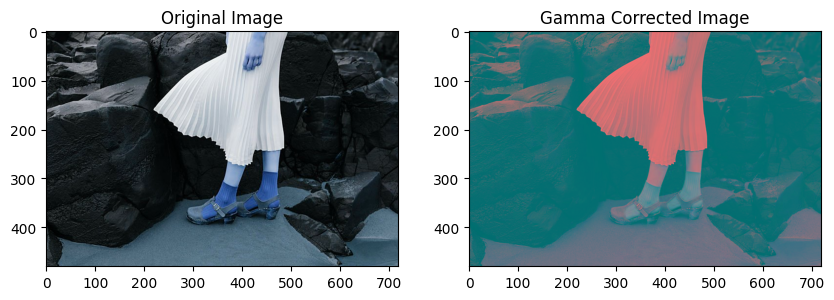

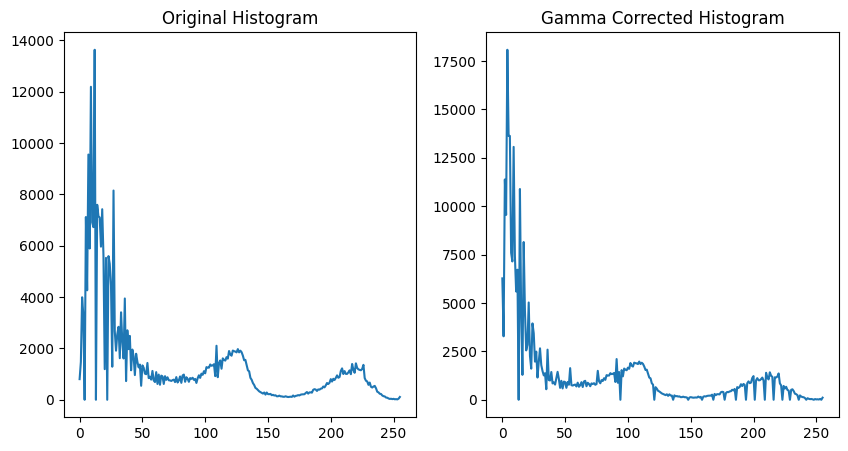

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread ('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert im is not None

im_LAB = cv.cvtColor(im, cv.COLOR_BGR2LAB) 

gamma = 1.2
t = np.array([(i/255.)**gamma*255 for i in range (256)], np.uint8)

plt.title("Gamma Correction Curve")
plt.plot(t)
plt.show()

g=t[im_LAB]

fig, ax = plt.subplots(1,2, figsize=(10,3.5))
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(g,cmap="gray")
ax[1].set_title("Gamma Corrected Image")
plt.show()

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram')
im_h = cv.calcHist([im_LAB],[0],None,[256],[0,256])
plt.plot(im_h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Gamma Corrected Histogram')
g_h = cv.calcHist([g],[0],None,[256],[0,256])
plt.plot(g_h)
plt.show()

QUESTION 4

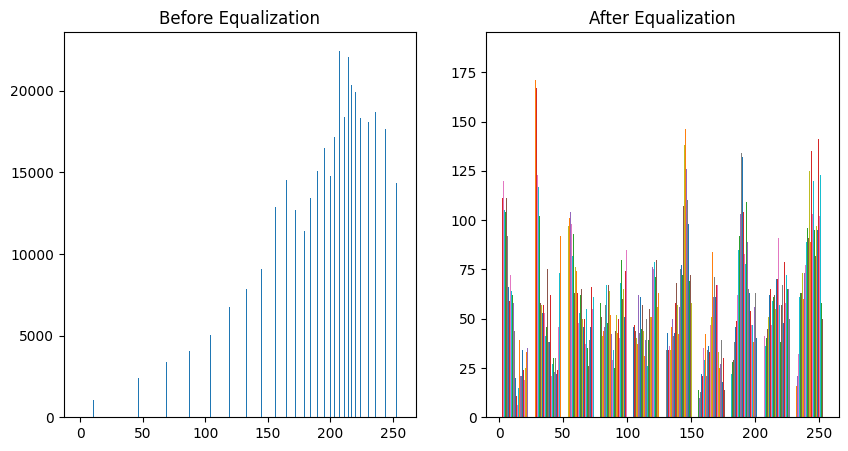

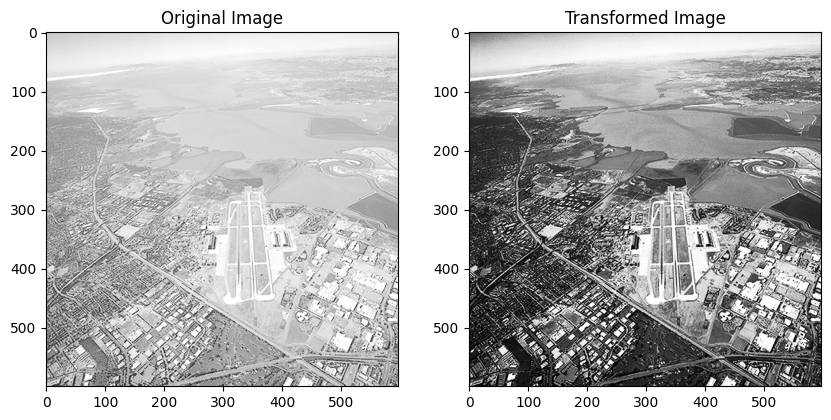

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#not changed
im = cv.imread('washed_out_aerial_image.png', cv.IMREAD_GRAYSCALE)
assert im is not None

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Before Equalization')
before = np.zeros(256)
before = [np.sum(im==i) for i in range (256)]
plt.bar(range(256), before)

plt.subplot(1, 2, 2)
plt.gca().set_title('After Equalization')
after = cv.equalizeHist(im)
plt.hist(after)
plt.show()

fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original Image')
ax[1].imshow(after, cmap="gray")
ax[1].set_title('Transformed Image')
plt.show()

QUESTION 5

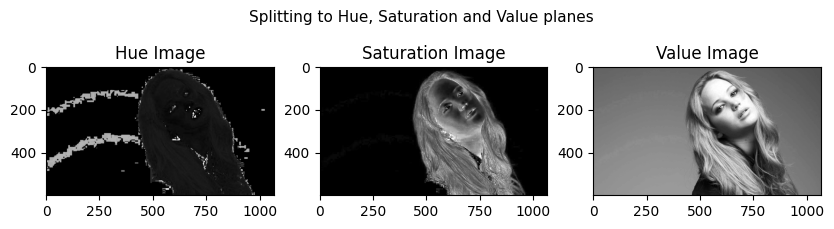

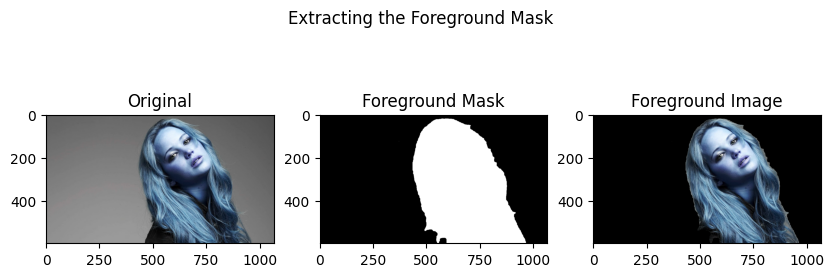

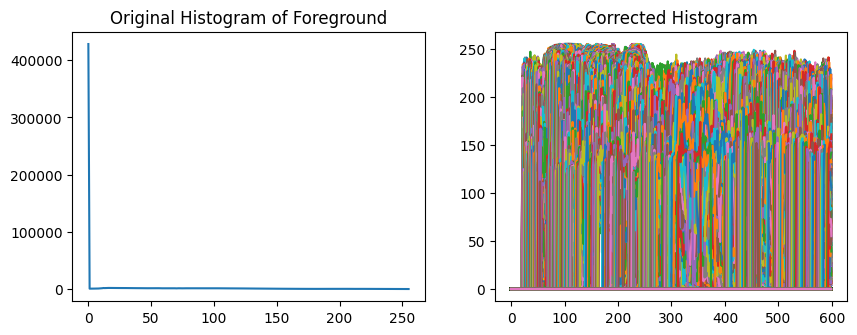

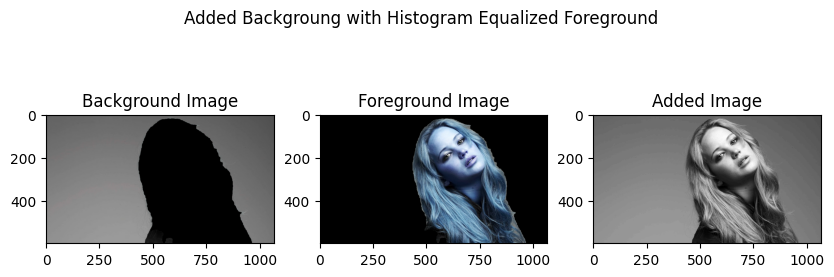

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#not changed
im = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
hue_img,sat_img,value_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("Splitting to Hue, Saturation and Value planes", fontsize=11)
ax[0].imshow(hue_img, cmap="gray")
ax[0].set_title('Hue Image')
ax[1].imshow(sat_img, cmap="gray")
ax[1].set_title('Saturation Image')
ax[2].imshow(value_img, cmap="gray")
ax[2].set_title('Value Image')
plt.show()

lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])
thresh = cv.inRange(sat_img, 15, 230)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))
morph = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
mask = morph
result = cv.bitwise_and(im, im, mask=mask)

fig, ax = plt.subplots(1,3, figsize=(10,3.5))
fig.suptitle("Extracting the Foreground Mask")
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Foreground Mask")
ax[2].imshow(result, cmap="gray")
ax[2].set_title("Foreground Image")
plt.show()

#histogram
cum_sum = np.cumsum(result) #cumulative sum

plt.figure(figsize = [10, 3.5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram of Foreground')
f_h = cv.calcHist([result],[0],None,[256],[0,256])
plt.plot(f_h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Corrected Histogram')
result_1 = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
eh = cv.equalizeHist(result_1)
plt.plot(eh)
plt.show()

#background image
mask1 = 255 - morph
b_im = cv.bitwise_and(im, im, mask=mask1)
b_im_1 = cv.cvtColor(b_im, cv.COLOR_BGR2GRAY);
#added image
im_1 = cv.addWeighted(b_im_1,0.5, result_1,0.5,0.0)

fig, ax = plt.subplots(1,3, figsize=(10,3.5))
fig.suptitle("Added Backgroung with Histogram Equalized Foreground")
ax[0].imshow(b_im, cmap="gray")
ax[0].set_title("Background Image")
ax[1].imshow(result, cmap="gray")
ax[1].set_title("Foreground Image")
ax[2].imshow(im_1, cmap="gray")
ax[2].set_title("Added Image")
plt.show()